In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [88]:
from fastai.vision import *
from fastai.metrics import error_rate

from os import path
import boto3
import tarfile

# fastai CNN Training


## Get Data

fastai's `untar_data` doesn't work for file stored in S3 (it seems it can only download data that it has direct access to).

In [89]:
s3 = boto3.client('s3')
data_path = 'data/restaurants.tar.gz'
if not path.exists(data_path):
    s3.download_file('poi-ml', 'fastai/downloads.tar.gz', data_path)
tarfile.open(data_path, 'r:gz').extractall('data')

In [90]:
path = Path('data/downloads/')
path

PosixPath('data/downloads')

In [111]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, valid_pct=.2)

You can deactivate this warning by passing `no_check=True`.


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/fastai/basic_data.py:259: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 982,1779
  warn(warn_msg)


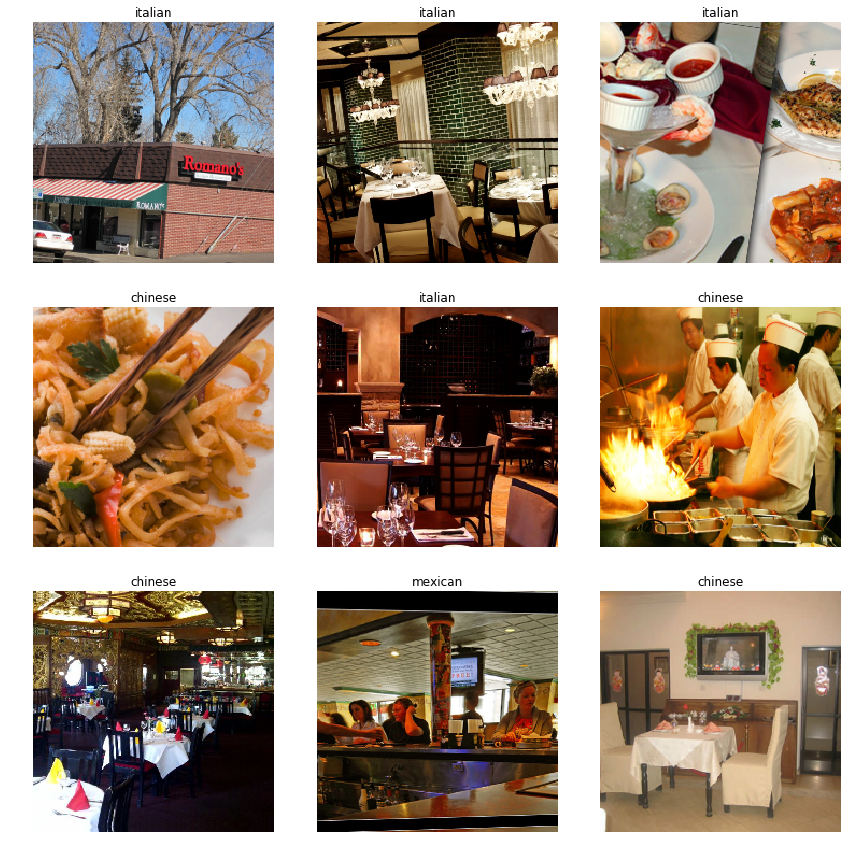

In [115]:
data.show_batch(rows=3, fig_size=(5, 5))

In [116]:
print(data.classes)
len(data.classes),data.c

['chinese', 'italian', 'mexican']


(3, 3)